In [ ]:
# ==========================================================
#  Insurance Risk Classification Model Using Random Forest
#  Author: Mark Altshuler
#  Description: Predicts insurance risk category (Low, Medium, High)
#  ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
# Preprocessing
df = pd.read_csv("../Data/insurance.csv")

# ---  Sanity Check ---
df = df.dropna().drop_duplicates().reset_index(drop=True)

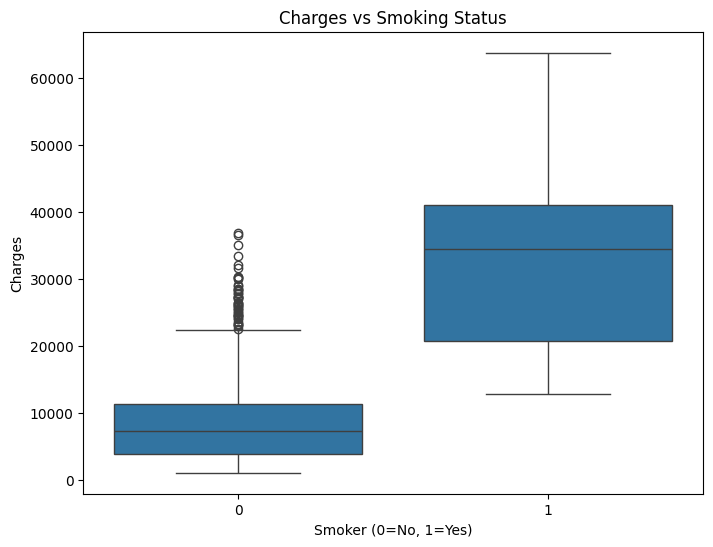

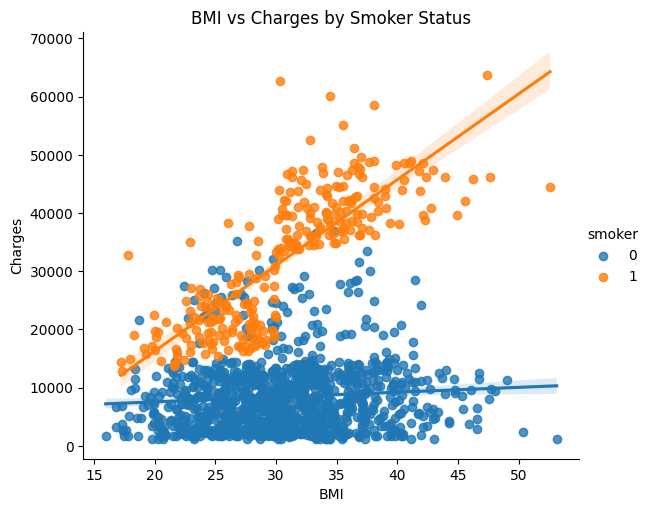

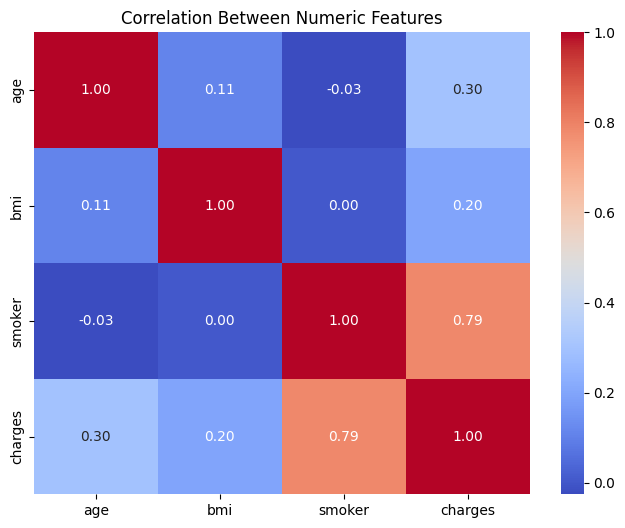

Final dataframe shape: (1337, 10)


,age,sex,bmi,children,smoker,charges,risk,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,High,False,False,True
1,18,0,33.770,1,0,1725.55230,Low,False,True,False
2,28,0,33.000,3,0,4449.46200,Low,False,True,False
3,33,0,22.705,0,0,21984.47061,High,True,False,False
4,32,0,28.880,0,0,3866.85520,Low,True,False,False


In [ ]:
# --- Risk Classes ---
df["risk"] = pd.qcut(df["charges"], q=3, labels=["Low", "Medium", "High"])

# Map binary columns
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

# --- Exploratory Data Visualizations ---

# Charges vs Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoking Status")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Charges")
plt.show()

# BMI vs Charges by Smoking Status
sns.lmplot(data=df, x="bmi", y="charges", hue="smoker", height=5, aspect=1.2)
plt.title("BMI vs Charges by Smoker Status")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Correlation Heatmap for Numeric Features
numeric_cols = ["age", "bmi", "smoker", "charges"]
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

# --- Encode Categorical Variables ---

#one-hot encoding should help with accuracy.
df = pd.get_dummies(df, columns=["region"], drop_first=True)

print("Final dataframe shape:", df.shape)
df.head()



In [4]:
# --- Train Random Forest Classifier ---

# --- Features & Target ---
X = df.drop(["charges", "risk"], axis=1) 
y = df["risk"]

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)

rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=8,            
    random_state=42
)
rf_model.fit(X_train, y_train)

# --- Predict ---
y_pred_rf = rf_model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.86      0.92        90
         Low       0.88      0.92      0.90        89
      Medium       0.86      0.94      0.90        89

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268

Accuracy: 0.907


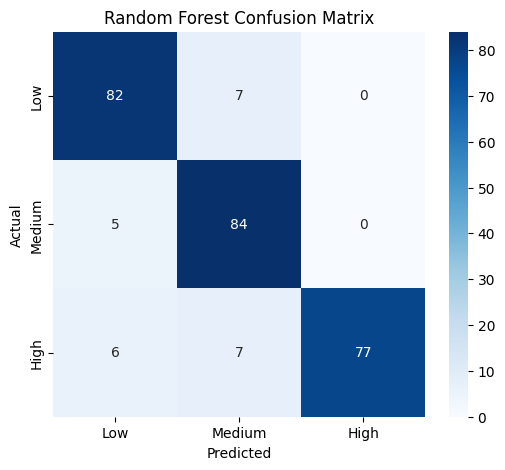

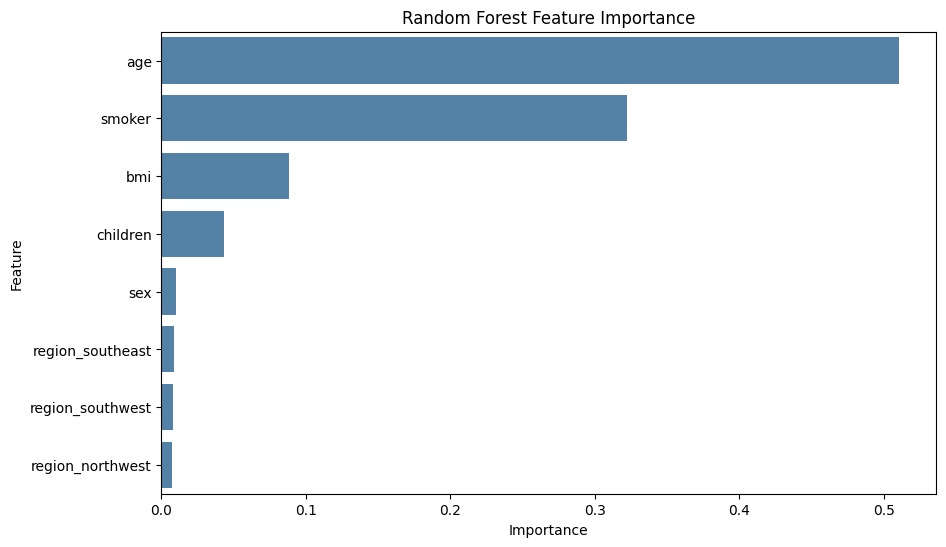

In [5]:
cm = confusion_matrix(y_test, y_pred_rf, labels=["Low", "Medium", "High"])

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))

# --- Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Feature Importance Heatmap ---
import pandas as pd
coef_df_rf = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y=coef_df_rf.index, data=coef_df_rf, color="steelblue")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



In [6]:
# --- Save Model ---
joblib.dump(rf_model, "../Models/insurance_risk_model.pkl")

['../Models/insurance_risk_model.pkl']